# Building a Causal Models

## From ATE to CATE


It's a bit strange to name a chapter Building Causal Models this far out in the book. If not building causal models, what have we been doing up until this point? Fair enough. Perhaps a better name would be Building Conditional Average Treatment Effect models, but that's just too long. Let me clarify, then. In the first part of the book, we've focused on estimating the Average Treatment Effect (ATE)

$$
E[Y_1−Y_0]
$$

or the continuous treatment equivalent

$$
E[y'(t)]
$$

where \\(y'(t)\\) is the treatment derivative of the response function or outcome. That gave us techniques to know the general effectiveness of a treatment. It's something useful to have when the type of decision making problem you have is binary: to treat or not to treat. Now, on part two, we will move to a finer analysis of the treatment effect. I've been hinting on it now and then, but it's time we make it explicit. Now, we will focus on estimating the Conditional Average Treatment Effect (CATE)

$$
E[Y_1−Y_0 | X] \ \text{or} \ E[y'(t)|X]
$$

The conditioning on \\(X\\) here means that we now allow the treatment effect to be different depending on the characteristics of each unit. As I've said before, the CATE is better suited when we want to do personalisation. Here, we believe that not all entities respond equally well to the treatment. Not only that, we want to leverage that heterogeneity. We want to treat only the right units (on the binary case) or figure out what is the optimal treatment dosage for each unit (on the continuous case).  

For instance, if you are a bank that has to decide the loan each customer is eligible for, you can be damn sure that it is not a good idea to give loads of money to everyone - although it might be reasonable for some. Here, you will have to be smart with your treatment (loan amount). Perhaps, depending on the customer credit score (\\(X\\)), you can figure out what is the proper loan dosage. Of course, you don't need to be a big institution to leverage personalization. There's no shortage of examples where it applies. What days of the year should you do sales? How much should you charge for whatever product?

In the previous chapter, we went through the example of figuring out how much discount we should give for each individual customer. We tried using predictive machine learning for that task, but things didn't go so well. Prediction ended up hindering our ability to estimate the CATE. It's a good idea to recap what we saw then so we can come up with some idea on how to fix it.

To better grasp the problem, you can think about the entities you have (be that customers, days, stores) as points in a Treatment and Outcome plot.

![img](./data/img/causal-model/customers.png)

Your intuition tells you that there is probably some sort of personalisation you can do here. For instance, sure you could give everyone the same discount on a product, but it is probably the case that there are people for whom the discount would be better than for others. Making this intuition more precise, we could say that you think there are entities that are more responsive to the treatment than others. If that is the case, you want to partition your entity space in such a way that it groups the units with high responsiveness together and, at the same time, separates them from the units with low response. 

The problem with the prediction model is that it essentially partitions the space on the thing it predicts, that is, on the outcome \\(Y\\). 


![img](./data/img/causal-model/y-partition.png)

By definition, the goal of prediction is to produce a new dimension, \\(\hat{Y}\\), where the thing you are trying to predict doesn't change much when we hold that dimension fixed. If you make a model that predicts sales and you look at groups of entities with the same sales prediction, the real or observed sales shouldn't change much in that group, or else your prediction model sucks. 

Here is another way of putting it: looking at partitions defined by a prediction model of \\(Y\\), by definition, lowers the range in which \\(Y\\) is allowed to vary. And that's a huge problem if your goal is not prediction, but understanding how \\(Y\\) changes with \\(T\\). Because if the changes in \\(Y\\) are suddenly constrained, or if \\(Y\\) is suddenly held fixed by your prediction, you won't see it changing once you move \\(T\\). 

![img](./data/img/causal-model/y-split.png)

This is what is shown in the image above. Once you partition your data on the outcome axis, you forcibly make it so that \\(Y\\) can't change much if you move \\(T\\), which hinders your ability to know how \\(T\\) affects \\(Y\\). 

Of course this is a rather dramatized case, because in real life you almost never predict \\(Y\\) that well, so it will vary even for groups defined by the same prediction. But the central idea remains: focusing on prediction does not move you in the right direction when your goal is to estimate elasticity, that is, \\(\frac{\delta Y}{ \delta T}\\).

So what does? Here is an idea. What if instead of predicting \\(Y\\), we tried to predict the derivative \\(\frac{\delta Y}{ \delta T}\\). If we could manage to do that, what would hopefully happen is that we would split the space somewhat like the following image.

![img](./data/img/causal-model/elast-partition.png)

That would be wonderful because now we would be able to estimate different elasticities on each partition. And notice here that the elasticity is just the slope of the line or function that goes from \\(T\\) to \\(Y\\). So, if we can produce partitions where the slope or elasticity differs, it means that entities on those partitions have different responsiveness to the treatment. Then we can personalise. 

![img](./data/img/causal-model/elast-split.png)

In other words, what you want is to move away from predicting \\(Y\\) in its raw form and start to predict the derivative of \\(Y\\) on \\(T\\),  \\(\frac{\delta Y}{ \delta T}\\). For example, suppose that \\(Y\\) is ice cream sales, \\(T\\) is ice cream price and each unit \\(i\\) is a day. Let's set moral issues aside, for the sake of the argument, and pretend that you can change the price of ice cream every day. If you can somehow find the days where \\(\frac{\delta Sales}{ \delta Price}\\) **is low**, that means you can increase prices without losing much sales on those days. Perhaps you do this already, say, when you increase them on holiday season. The point being, it's useful to you to differentiate days in terms of the price elasticity because it gives you some basis on how to set prices in an optimal way.

Ok, you might say, but this is kind of triky. How can I predict elasticity \\(\frac{\delta Sales}{ \delta Price}\\) if I can't observe it. That's a very good point. Elasticity is essentially non observable on an entity level. To conceptualise it, you can think about each entity as having a \\(Y_i\\) value, sales in our example, but also an individual elasticity. The elasticity is how much \\(Y\\) changes with \\(T\\), so you can think about each entity also having a sope coneficient associeted to it \\(\frac{\delta Y}{ \delta T}_i\\). In our example, we would say each day has a slope coeficient of price on sales.

![img](./data/img/causal-model/elasticity.png)

Of course, we can't see those individual slope coefficients. For us to see the individual slopes, we would had to see each day under two different prices and see how the sales changes for each of those prices

$$
\frac{\delta Y_i}{ \delta T_i} \approx \frac{Y(T_i) - Y(T_i + \epsilon)}{T_i - (T_i + \epsilon)}
$$

This is the fundamental problem of causal inference all over again. We can't ever see the same unite under different treatment conditions.

## Predicting Elasticity

We got to a complicated situation here. We figured that predicting \\(Y_i\\) would actually hinder our capacity of figuring out how to impact \\(Y\\) by playing with \\(T\\). Rather, to solve that problem, we would have to predict the elasticity \\(\frac{\delta Y_i}{ \delta T_i}\\). Sadly, we can't observe elasticity, so what can we do to predict it???

Here is another idea. You can still fit a linear model

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + e_i
$$

If you differentiate the thing above on the treatment, you will end up with

$$
\frac{\delta y_i}{\delta t_i} = \beta_1 
$$

And since you can estimate the model above to get \\(\hat{\beta_1}\\), we might even be as bold as to say that **you can predict elasticity even though you can't observe it**. In the case above, it is a rather simple prediction, that is, we are predicting the constant vale \\(\hat{\beta_1}\\) for everyone. That's the ATE, not the CATE. This doesn't help us in our task of grouping entities according to how responsive they are to the treatment, simply because everyone gets the same elasticity prediction. However, we can do the following change

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i  + e_i
$$

Which would give us the follow elasticity prediction

$$
\widehat{\frac{\delta y_i}{\delta t_i}} = \hat{\beta_1} + \hat{\beta_3}X_i
$$

Where \\(beta_3\\) is a vector coefficient for the feature set in \\(X\\). 

Now, each entity defined by a different \\(X_i\\) will have a different elasticity prediction. In other words, the elasticity prediction will change if the features \\(X_i\\) changes. In other words, the model above gives us a way of estimating the CATE \\(E[y'(t)|X]\\).

Now we are getting somewhere. The model above allows us to make an elasticity prediction for each of our entities. With those predictions we can make more useful groups. We can take the units with high predicted elasticity and group them together. We can do the same with the ones that have low predicted elasticity. Finally, with our elasticity predictions, we can group entities by how much we think they will respond to the treatment.

Enough of theory for now. It's time to walk through an example of how to make this sort of elasticity model. Let's consider our icecream example. Each unit \\(i\\) is a day. For each day, we know if it's a weekday or not, what was the cost we had to make the ice cream (you can think of cost as a proxy for quality) and the average temperature for that day. Those will be our feature space \\(X\\). Then, we have our treatment, price, and our outcome, the number of ice cream sold. For this example, we will consider that the treatment is randomized, just so that we don't have to worry with bias for now.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
print(prices_rnd.shape)
prices_rnd.head()

(5000, 5)


,temp,weekday,cost,price,sales
0,25.8,1,0.3,7,230
1,22.7,3,0.5,4,190
2,33.7,7,1.0,5,237
3,23.0,4,0.5,5,193
4,24.4,1,1.0,3,252


Just as we do with prediction models, we will also split our dataset into a training and a testing sample. We can then estimate the model on the first set and make predictions on the last.

In [3]:
np.random.seed(123)
train, test = train_test_split(prices_rnd)

The first model we will consider is the following linear model

$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2}X_i + e_i
$$

If we inspect the parameters of this model, we can see what our predicted elasticity will look like. 

In [4]:
m1 = smf.ols("sales ~ price + temp+C(weekday)+cost", data=train).fit()
m1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,186.7113,1.770,105.499,0.000,183.241,190.181
C(weekday)[T.2],-25.0512,0.924,-27.114,0.000,-26.863,-23.240
C(weekday)[T.3],-24.5834,0.901,-27.282,0.000,-26.350,-22.817
C(weekday)[T.4],-24.3807,0.897,-27.195,0.000,-26.138,-22.623
C(weekday)[T.5],-24.9036,0.894,-27.850,0.000,-26.657,-23.150
C(weekday)[T.6],-24.0921,0.903,-26.693,0.000,-25.862,-22.323
C(weekday)[T.7],-0.8635,0.888,-0.972,0.331,-2.605,0.878
price,-2.7515,0.106,-25.970,0.000,-2.959,-2.544
temp,1.9848,0.060,33.117,0.000,1.867,2.102
cost,4.4718,0.528,8.462,0.000,3.436,5.508


For \\(m1\\), the predicted price elasticity \\(\widehat{\frac{\delta y_i}{\delta t_i}}\\) will be given by \\(\hat{\beta_1}\\), which is -2.75, in our case. This means that for each additional BRL we charge for our ice cream, we should expect sales to go down by about 3 units. 
Notice how this \\(m1\\) predicts the exact same elasticity for everyone. Hence, it is not a very good model if we want to know on which days are people less sensitive to ice cream price increases. It estimates the ATE when what we need here is the CATE. Remember that our goal is to partition the entities in such a way that we can personalize and optimise our treatment (price) for each individual partition. If every prediction is the same, there is no partitioning we can make. To correct for that, consider our second model:

$$
sales_i = \beta_0 + \beta_1 price_i + \beta_2 price_i * temp_i * + \pmb{\beta_3}X_i + e_i
$$

This second model includes an interaction term between price and temperature. This means that it allows the elasticity to differ for different temperatures.

In [5]:
m2 = smf.ols("sales ~ price*temp + C(weekday) + cost", data=train).fit()
m2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,192.4767,4.371,44.037,0.000,183.907,201.046
C(weekday)[T.2],-25.0805,0.924,-27.143,0.000,-26.892,-23.269
C(weekday)[T.3],-24.5871,0.901,-27.290,0.000,-26.354,-22.821
C(weekday)[T.4],-24.4225,0.897,-27.231,0.000,-26.181,-22.664
C(weekday)[T.5],-24.8953,0.894,-27.844,0.000,-26.648,-23.142
C(weekday)[T.6],-24.1269,0.903,-26.726,0.000,-25.897,-22.357
C(weekday)[T.7],-0.8581,0.888,-0.966,0.334,-2.599,0.883
price,-3.6299,0.618,-5.873,0.000,-4.842,-2.418
temp,1.7459,0.176,9.912,0.000,1.401,2.091
price:temp,0.0366,0.025,1.443,0.149,-0.013,0.086


Once we estimate the model, the predicted elasticity is given by

$$
\widehat{\frac{\delta sales_i}{\delta price_i}} = \hat{\beta_1} + \hat{\beta_3}temp_i
$$

Notice that \\(\hat{\beta_3}\\) is positive 0,03 and the baseline elasticity (the elasticity at \\(0C^o\\)) is -3.6. This means that, on average, as we increase price, sales go down, which makes sense. It also means that for each additional degree in temperature, people become less sensitive to price increases on ice cream (although not by much). For example, at \\(25C^o\\), for each additional BRL we charge, our sales go down by 2.8 units \\((-3.6 + (0.03 * 25))\\). But at  \\(35C^o\\), for each additional BRL we charge, they go down only by 2.5 units \\((-3.6 + (0.03 * 35))\\). This is also sort of intuitive. As the days get hotter and hotter, people are willing to pay more for ice cream.  

We can go even further. The next model includes interaction terms on all the feature space. This means that elasticity will change with temperature, day of the week, and cost.

$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2 X_i}*price_i + \pmb{\beta_3}X_i + e_i
$$

In [6]:
m3 = smf.ols("sales ~ price*cost + price*C(weekday) + price*temp", data=train).fit()

According to the above model, the individual level elasticity would be given by

$$
\frac{\delta Sales}{\delta Price} = \beta_1 + \pmb{\beta_2 X_i}
$$

Where \\(\beta_1\\) is the price coefficient and \\(\pmb{\beta_2}\\) is the vector for the interaction coefficients. 

Finally, let's see how to actually make those elasticity predictions. One way to do them is to actually extract the elasticity parameters from the model and use the formula above. However, we will resort to a more general approximation. Since elasticity is nothing more than the derivative of the outcome on treatment, we can resort to the definition of the derivative.

$$
\frac{\delta y}{\delta t} = \dfrac{y(t+\epsilon) - y(t)}{ (t + \epsilon) - t }
$$

with \\(\epsilon\\) going to zero. We can approximate this definition by replacing \\(\epsilon\\) by 1. 

$$
\frac{\delta y}{\delta t} \approx \hat{y}(t+1) - \hat{y}(t)
$$

where \\(\hat{y}\\) is given by our model's predictions. In words, I'll make two predictions with my models: one, passing the original data and another, passing the original data but with the treatment incremented by one unit. Below, you can see a function for doing that.

Since we've used the train set to estimate our model, we will now make predictions on the test set. 

In [7]:
def pred_elasticity(m, df, t="price"):
    return df.assign(**{
        "pred_elast": m.predict(df.assign(**{t:df[t]+1}))  - m.predict(df)
    })

pred_elasticity(m1, test).head()

,temp,weekday,cost,price,sales,pred_elast
2648,18.6,7,0.5,10,185,-2.751463
2456,26.0,3,0.5,10,200,-2.751463
4557,23.7,3,0.3,8,192,-2.751463
4884,28.9,4,1.5,6,213,-2.751463
92,23.7,1,0.5,8,207,-2.751463


Making elasticity predictions using \\(m1\\) is not much fun. We can see that it predicts the exact same value for all the days. That's because there are no interaction terms on that model. However, if we make predictions using \\(m3\\), it outputs a different elasticity prediction for each day.

In [8]:
pred_elast3 = pred_elasticity(m3, test)

np.random.seed(1)
pred_elast3.sample(5)

,temp,weekday,cost,price,sales,pred_elast
4764,31.1,6,1.0,3,212,1.144309
4324,24.8,7,0.5,10,182,-9.994303
4536,25.0,2,1.5,6,205,0.279273
3466,26.0,3,1.5,3,205,0.308320
115,19.3,3,0.3,9,177,-0.349745


Notice how the predictions are numbers that go from something like -9 to something 1. Those are not predictions of the sales column, which is in the order of the hundreds. Rather, **it's a prediction of how much sales would change if we increased price by one unit**. Right out of the bet, we can see some strange numbers. For example, take a look at day 4764. It's predicting a positive elasticity. In other words, we are predicting that sales will increase if we increase ice cream price. This doesn't appeal to our economic sense. It's probably the case that the model is doing some weird extrapolation. Fortunately, you don't have to worry too much about it. Remember that our ultimate goal is to segment the units by how sensitive they are to the treatment. It is not to come up with the most accurate elasticity prediction ever. For our main goal, it is sufficient if our elasticity is predictions and orders the units according to how sensitive they are. In other words, even if positive elasticity predictions like 1.1, or 0.5 don't make much sense here, all we need is that the ordering is correct, that is, we want the units with prediction 1.1 to be less impacted by price increase than units with predictions 0.5. 

Now that we have our elasticity model, let us contrast it with a purely predictive model. We will use a Machine Learning algorithm that uses price, temperature, weekday and cost as features \\(X\\) and tries to predict ice cream sales.

In [9]:
X = ["temp", "weekday", "cost", "price"]
y = "sales"
ml = GradientBoostingRegressor()
ml.fit(train[X], train[y])

# make sure the model is not overfiting.
ml.score(test[X], test[y])

0.9124088322890126

This model can make predictions about how much sales we will have on each day. But is it suited for what we really want?

To see which model is more useful, let's try using them for segmenting the units. For each model, we will partition the units into 2 groups. Our hope is that one group is highly responsive to price increase while the other not so much. If that is the case, we can organize our business around those groups: for the days that fall in the high responsiveness group, we better not set prices too high. For the low responsiveness group, we can increase prices without risking too much in sales.

In [10]:
bands_df = pred_elast3.assign(
    elast_band = pd.qcut(pred_elast3["pred_elast"], 2),
    pred_sales = ml.predict(pred_elast3[X]),
    pred_band = pd.qcut(ml.predict(pred_elast3[X]), 2),
)

bands_df.head()

,temp,weekday,cost,price,sales,pred_elast,elast_band,pred_sales,pred_band
2648,18.6,7,0.5,10,185,-10.301045,"(-10.597999999999999, -0.00555]",186.878081,"(161.089, 198.735]"
2456,26.0,3,0.5,10,200,0.036165,"(-0.00555, 1.389]",203.188327,"(198.735, 257.746]"
4557,23.7,3,0.3,8,192,-0.132057,"(-10.597999999999999, -0.00555]",188.800637,"(161.089, 198.735]"
4884,28.9,4,1.5,6,213,0.860663,"(-0.00555, 1.389]",210.430813,"(198.735, 257.746]"
92,23.7,1,0.5,8,207,-9.953698,"(-10.597999999999999, -0.00555]",209.044522,"(198.735, 257.746]"


I might be getting ahead of myself now, since we will only look at model evaluation on the next chapter. But I feel I can give you a taste of what it looks like. One very simple way to check how good are those partition schemas - and by good I mean useful - is to plot a regression line of prices on sales for each partition. We can achieve that easily with Seaborn's `regplot` combined with `FacetGrid`. 

Below, we can see the one for the partitions made using the elasticity predictions. Remember that all of this is done in the test set.

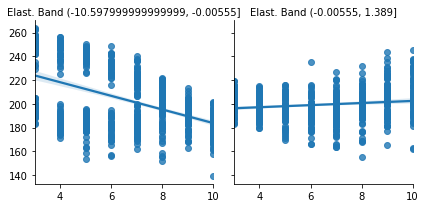

In [11]:
g = sns.FacetGrid(bands_df, col="elast_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Elast. Band {col_name}");

As we can see, it looks like this partitioning scheme is useful. For the first partition, it looks like there is a high price sensitivity. Sales goes down by a lot as prices go up. However, for the second partition, sales remain roughly unganged as price goes up. In fact, it even looks like sales goes up as we increase price, but that's probably noise. 

Contrast this with the partitions made using the ML prediction model.

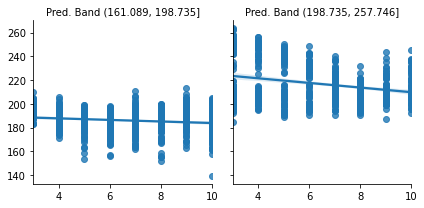

In [12]:
g = sns.FacetGrid(bands_df, col="pred_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Pred. Band {col_name}");

I really like this plot because it conveys a very important point. As you can see, the predictive model partitions are splitting the units on the y axis. On days like those in the first partition, we don't sell a lot of ice cream. Moreover, we do sell more on days like those in the second partition. I find this amazing because the prediction model is doing exactly what it is supposed to do: it predicts sales, so it can distinguish between days where there will be low versus high ice cream sales.

The only problem is that prediction is not particularly useful here. Ultimately, we want to know when we can increase prices and when we can't. But once we look at the slopes of the lines in the predictive model partitions, we see that they don't change much. In other words, both partitions, as defined by the prediction model, have about the same responsiveness to price increase. This doesn't offer us much insight into which are the days we can increase prices, since it looks like price does not affect sales at all. 


## Key Ideas

Here we saw how using prediction models can hinder our capacity to understand how a treatment affects an outcome. This is very problematic if our goal is not prediction, but rather optimization, where we want to set a value for \\(T\\) in order to maximise \\(Y\\). Lot's of business problems are in that format: deciding how much to charge for a product, figuring out what interest rate to set on a loan, deciding discount policies and so on. If that is our goal, we are much better off with causal models that predict elasticity: the sensitivity of the outcome on the treatment. 

Sadly, it's not at all obvious how to build those models. Since we can't observe elasticity directly, it's hard to make a model that predicts it. Here, we used the idea of a linear regression model that is fitted to predict \\(Y\\), but, in doing so, gives us a way to also predict \\(\frac{\delta y}{\delta t}\\). To do that, we had to include interaction terms of the treatment and the features. This made it so that the elasticity changes as with different features. Then, we can have elasticity predictions and use those elasticity predictions to group our units by how responsive they are to our treatment, ultimately helping us decide the treatment level for each group.

One natural question that arises from all this is if we can replace the linear regression by a generic machine learning model and use that to predict elasticity. The answer is yes, but there are some caveats. This chapter used a very simple causal model because I think it's easier to understand the concept behind them with linear regression, but we will see some more sophisticated models in the chapters to come. But before that, I first need to cover a very important topic, which is how can we compare two causal models an decide which one is better. 


## References 

The things I've written here are mostly stuff from my head. I've learned them through experience. This means there isn't a direct reference I can point you to. It also means that the things I wrote here have **not** passed the academic scrutiny that good science often goes through. Instead, notice how I'm talking about things that work in practice, but I don't spend too much time explaining why that is the case. It's a sort of science from the streets, if you will. However, I am putting this up for public scrutiny, so, by all means, if you find something preposterous, open an issue and I'll address it to the best of my efforts.